# Basic statistics for web_pages.csv file

# Libraries to load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

# Let's start the pivot tables (rather group_by)

## Loading of web_pages.csv as dataframe

In [2]:
#web_pages =  pd.read_csv('data/web-pages.csv', nrows=1000) #uncomment this line and comment the next one if you would prefer to play with the first x rows to spare memory and time.
web_pages =  pd.read_csv('data/web-pages.csv')
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
0,20200309191009,cdc.gov,https://www.cdc.gov/coronavirus/2019-ncov/inde...,text/html,text/html,en,Coronavirus Disease 2019 (COVID-19) | CDC Skip...
1,20200309191053,cdc.gov,https://www.cdc.gov/coronavirus/2019-ncov/inde...,text/html,text/html,en,Coronavirus Disease 2019 (COVID-19) | CDC Skip...
2,20200309191112,cdc.gov,https://wwwnc.cdc.gov/travel/page/covid-19-cru...,text/html,text/html,en,COVID-19 and Cruise Ship Travel | Travelers' ...
3,20200309191230,addthis.com,https://api.addthis.com/oexchange/0.8/forward/...,text/html,application/xhtml+xml,en,Missing Required Parameter Your request is mis...
4,20200309191313,addthis.com,https://api.addthis.com/oexchange/0.8/forward/...,text/html,NaN,NaN,NaN
...,...,...,...,...,...,...,...
8738748,20200421043445,isciii.es,https://www.isciii.es/QueHacemos/Servicios/Vig...,text/html,text/html,es,Informes MoMo 2020 ISCIII Inicio de sesión ca...
8738749,20200421084408,isciii.es,https://www.isciii.es/QueHacemos/Servicios/Vig...,text/html,text/html,es,Inicio ISCIII Inicio de sesión castellano eng...
8738750,20200421170500,facebook.com,https://www.facebook.com/login.php?next=https%...,text/html,text/html,en,Facebook Facebook You must log in to continue....
8738751,20200421171421,isciii.es,https://www.isciii.es/QueHacemos/Financiacion/...,text/html,text/html,es,Páginas - Financiación ISCIII Inicio de sesió...


## Count number of harvesting by day

In [3]:
# pd.pivot_table(web_pages,values='language',index=['crawl_date','domain'], columns='crawl_date')
web_pages_count_byCrawlDate = web_pages.groupby(['crawl_date']).size()
# web_pages_count_byCrawlDate.to_csv('generated/web_pages_count_byCrawlDate.csv')
web_pages_count_byCrawlDate

crawl_date
20200221184618    1
20200221184619    1
20200221184621    3
20200221184622    1
20200221184628    1
                 ..
20220119162827    1
20220119162829    1
20220119162835    1
20220119162838    2
20220119162841    2
Length: 5613830, dtype: int64

In [ ]:
web_pages_count_byCrawlDate = pd.read_csv('generated/web_pages_count_byCrawlDate.csv')
#plt.plot('0','crawl_date')
web_pages_count_byCrawlDate_chart = web_pages_count_byCrawlDate.plot.bar(figsize=(60, 10))

web_pages_count_byCrawlDate_chart.set_title("Number of crawls by date", fontsize=22)
web_pages_count_byCrawlDate_chart.set_xlabel("crawl_date", fontsize=20)
web_pages_count_byCrawlDate_chart.set_ylabel("Count", fontsize=20)

#initial code for this graph by Nick Ruest

## Domain frequency

In [ ]:
web_pages_count_byDomain = web_pages.groupby(['domain']).size()
web_pages_count_byDomain = web_pages_count_byDomain.sort_values(ascending=False)
web_pages_count_byDomain.to_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain

In [ ]:
web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain

In [ ]:
#just to know: the median
web_pages_count_byDomain_median = web_pages_count_byDomain["0"].median()
web_pages_count_byDomain_median

In [ ]:
#just to know: mean
web_pages_count_byDomain_mean = web_pages_count_byDomain["0"].mean()
web_pages_count_byDomain_mean

In [ ]:
#justo to know: standard deviation
web_pages_count_byDomain_std = web_pages_count_byDomain["0"].std()
web_pages_count_byDomain_std

In [ ]:
#the standard box plot

web_pages_count_byDomain_boxplot = web_pages_count_byDomain.boxplot()
web_pages_count_byDomain_boxplot.set_title("Boxplot", fontsize=22)
web_pages_count_byDomain_boxplot.set_xlabel(" ", fontsize=20)
web_pages_count_byDomain_boxplot.set_ylabel("Count", fontsize=20)

Text(0, 0.5, 'Count')

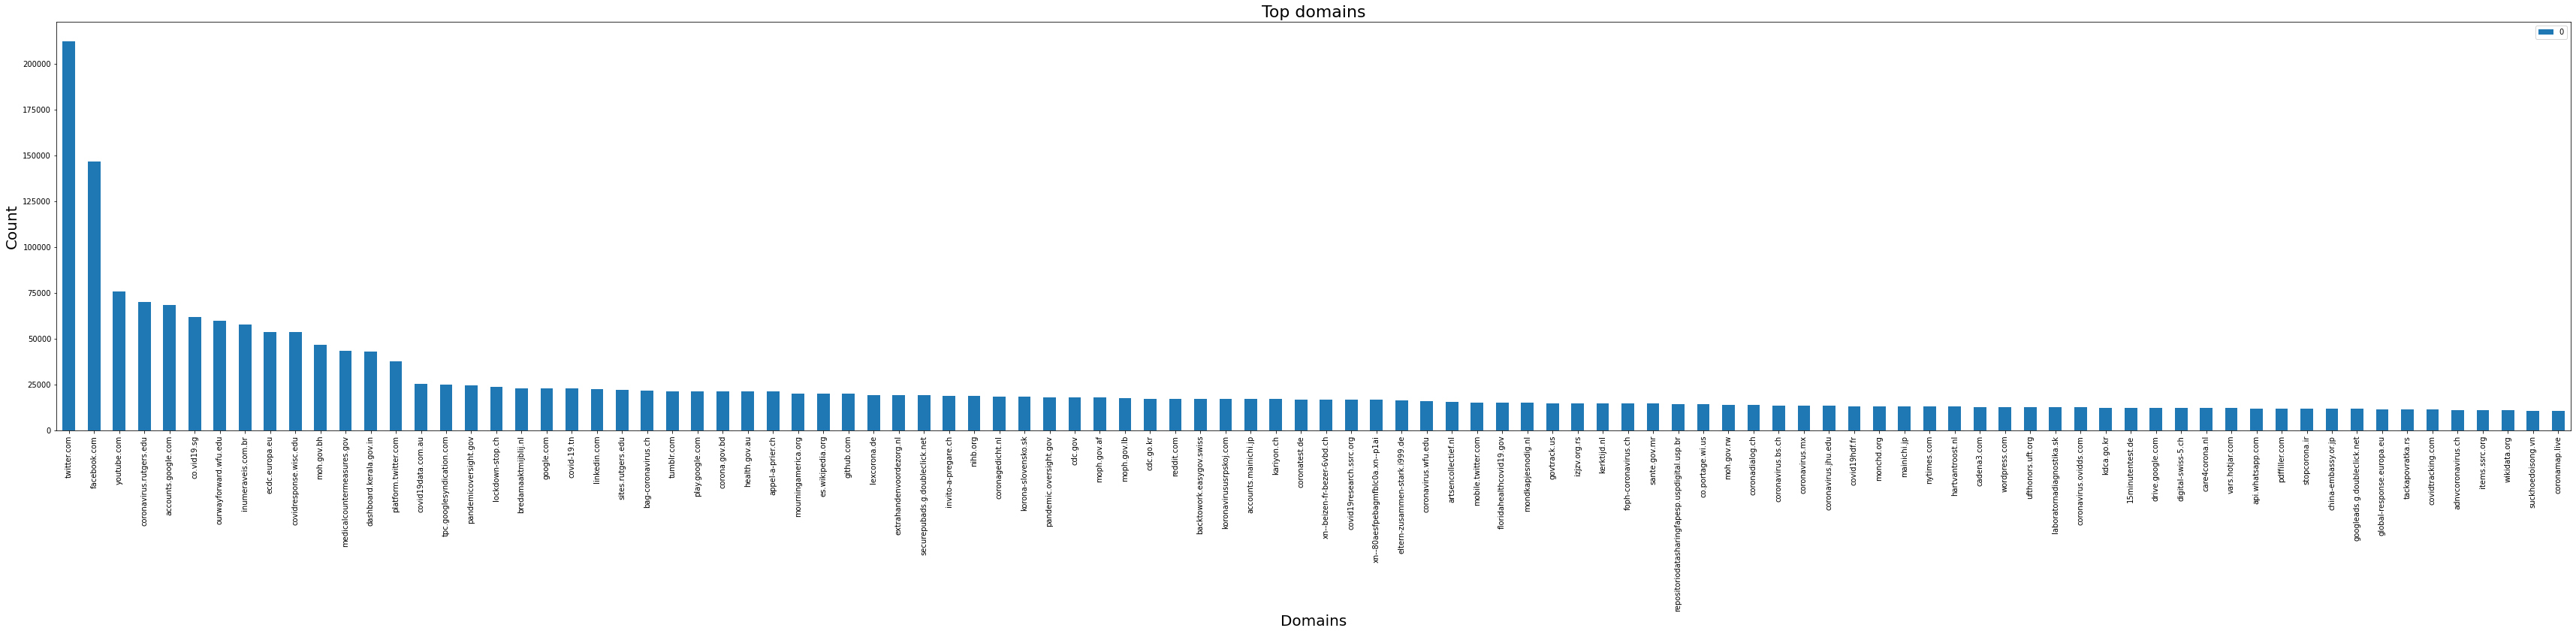

In [3]:
web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv')
topDomain = web_pages_count_byDomain.sort_values("0", ascending=False).head(100)

topDomain_chart = topDomain.plot.bar(figsize=(60, 10), x="domain")

topDomain_chart.set_title("Top domains", fontsize=22)
topDomain_chart.set_xlabel("Domains", fontsize=20)
topDomain_chart.set_ylabel("Count", fontsize=20)

In [ ]:
# looking at Twitter crawls

# we create a mask
twitter_crawls_mask = web_pages["domain"] == 'twitter.com'
# we apply the mask to web_pages, so that we have only the lines with twitter.com
twitter_crawls = web_pages[twitter_crawls_mask]
# we group by crawl_date
twitter_crawls_by = twitter_crawls.groupby(['crawl_date']).size()
twitter_crawls_by.to_csv('data/twitter_crawls_by.csv')
twitter_crawls_by

In [ ]:
# And now visualize it

twitter_crawls_by = pd.read_csv('data/twitter_crawls_by.csv')

twitter_chart = twitter_crawls_by.plot.bar(figsize=(60, 10), x="crawl_date")

twitter_chart.set_title("Twitter crawls", fontsize=22)
twitter_chart.set_xlabel("Date", fontsize=20)
twitter_chart.set_ylabel("Count", fontsize=20)

## Crawl by language (by date)

In [ ]:
# pd.pivot_table(web_pages,values='language',index=['crawl_date','domain'], columns='crawl_date')
web_pages_byCrawlDate_byLanguage = web_pages.groupby(['language','crawl_date']).size()
web_pages_byCrawlDate_byLanguage.to_csv('generated/web_pages_byCrawlDate_byLanguage.csv')
web_pages_byCrawlDate_byLanguage

In [4]:
web_pages_byCrawlDate_byLanguage = pd.read_csv('generated/web_pages_byCrawlDate_byLanguage.csv')
web_pages_byCrawlDate_byLanguage

,language,crawl_date,0
0,af,20200221,94
1,af,20200222,220
2,af,20200223,10
3,af,20200224,22
4,af,20200225,23
...,...,...,...
10962,zh-TW,20210714,512
10963,zh-TW,20210715,250
10964,zh-TW,20210723,198
10965,zh-TW,20210724,999


In [5]:
## Altair has a default limit of 5000 rows, and this DataFrame is ~11000 rows, so we're going to disable the max allowed rows.
alt.data_transformers.disable_max_rows()

crawl_chart = (
    alt.Chart(web_pages_byCrawlDate_byLanguage)
    .mark_bar()
    .encode(
        x="crawl_date:O",
        y="0:Q",
        color="language",
        tooltip="language",
        order=alt.Order("language", sort="descending"),
    )
)

crawl_chart.properties(width=1400, height=700, title="Crawl frequency by language")

alt.Chart(...)

In [7]:
# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_stream = (
    alt.Chart(web_pages_byCrawlDate_byLanguage)
        .mark_bar()
        .encode(
            alt.Tooltip("language"),
            alt.X('crawl_date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('0:Q', stack='center', axis=None),
            alt.Color('language:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_stream.properties(width=900, height=500, title="Crawl frequency by language")

alt.Chart(...)

In [8]:
#It Twitter always crawled with the 'en' tag?
# First a groupby with language, crawl_date and domain
web_pages_byCrawlDate_byLanguageAndDomain = web_pages.groupby(['language','crawl_date','domain']).size()
web_pages_byCrawlDate_byLanguageAndDomain.to_csv('generated/web_pages_byCrawlDate_byLanguageAndDomain.csv')
web_pages_byCrawlDate_byLanguageAndDomain = pd.read_csv('generated/web_pages_byCrawlDate_byLanguageAndDomain.csv')

NameError: name 'web_pages' is not defined

In [9]:
web_pages_byCrawlDate_byLanguageAndDomain = pd.read_csv('generated/web_pages_byCrawlDate_byLanguageAndDomain.csv')
# then we create a twitter mask
twitter_mask_byCrawlDate_byLanguageAndDomain = web_pages_byCrawlDate_byLanguageAndDomain['domain'] == 'twitter.com'
# we apply the mask to web_pages, so that we have only the lines with twitter.com
twitter_byCrawlDate_byLanguageAndDomain = web_pages_byCrawlDate_byLanguageAndDomain[twitter_mask_byCrawlDate_byLanguageAndDomain]
twitter_byCrawlDate_byLanguageAndDomain

,language,crawl_date,domain,0
589,af,20200424,twitter.com,1
635,af,20200511,twitter.com,1
637,af,20200513,twitter.com,1
1605,ar,20200221,twitter.com,6
1648,ar,20200222,twitter.com,95
...,...,...,...,...
581001,zh-CN,20200502,twitter.com,11
581005,zh-CN,20200503,twitter.com,10
581007,zh-CN,20200506,twitter.com,5
582077,zh-TW,20200420,twitter.com,1


In [10]:
# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_lang_twitter = (
    alt.Chart(twitter_byCrawlDate_byLanguageAndDomain)
        .mark_bar()
        .encode(
            alt.Tooltip("language"),
            alt.X('crawl_date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('0:Q', stack='center', axis=None),
            alt.Color('language:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_lang_twitter.properties(width=1000, height=500, title="Crawl frequency by language")

alt.Chart(...)

## We end this notebook by looking at the mime/type


In [ ]:
# Présence des langues

web_pages_byLanguage = web_pages.groupby(['language']).size()
web_pages_byLanguage = web_pages_byLanguage.sort_values(ascending=False)
web_pages_byLanguage.to_csv('generated/web_pages_byLanguage.csv')
web_pages_byLanguage

language_chart = web_pages_byLanguage.plot.bar(figsize=(60, 10), x="domain")

language_chart.set_title("Top domains", fontsize=22)
language_chart.set_xlabel("Domains", fontsize=20)
language_chart.set_ylabel("Count", fontsize=20)

Looks like a lot of HTML

In [ ]:
# We reload the libraries, so that you can use this section autonomously

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt


In [ ]:
!ls

In [ ]:
!cd data && ls

In [ ]:
domain_frq = pd.read_csv('data/domain-frequency.csv')
domain_frq